<h2> Assignment 5 Notebook </h2> 
<body>
<p>Full name : Kirthanaa Raghuraman</p>
<p>Wisc Id : kraghuraman</p>
<p>Test Setup details : Please install Plotly</p>
<p>Jupyter verison : </p>
</body>

In [1]:
import pandas as pd
# numpy has a lots of useful math related modules 
import numpy as np
# Helpful function to display intermittent result 
from IPython.display import display


In [2]:
import plotly
api_key = 'x2VydZH1XsaHpEunc8ZG'
plotly.tools.set_credentials_file(username='kraghuraman', api_key=api_key)


<H4>Step 0 : Take a peek at the dataset</H4>

In [ ]:
# Load the data and display only first five rows 
# NOTE replace the following value with the actual path to the csv file 
data_file = "AQI.csv" # e.g ~/cs564/p5/AQI.csv"
display(pd.read_csv(data_file, nrows=5).head())

<H5>Step 1 : Load the dataset</H5>


In [3]:
from sqlalchemy import create_engine
import sqlite3
# create a database where we'll load the dataset from the csv file 
db_conn = create_engine('sqlite:///AirQualityIndex.db')

In [ ]:
import string
# load in a batch of 5000 tuples. Modify this value to your needs
chunks = 5000
for data in pd.read_csv(data_file, chunksize=chunks,
 iterator=True, encoding='utf-8'):

 data = data.rename(columns={col: col.replace('-', ' ') for col in data.columns})
 data = data.rename(columns={col: col.strip() for col in data.columns})
 data = data.rename(columns={col: string.capwords(col) for col in data.columns})
 data = data.rename(columns={col: col.replace(' ', '') for col in data.columns})

 data.to_sql('data', db_conn, if_exists='append')

<H5>Step 2 : Data Exploration</H5>
<body>
<p> Find the average air quality index for each city recorded during the year 1997 </p>
</body>

In [4]:
avg_air_quality = pd.read_sql_query("""SELECT AVG(AQI) as avg_aqi, 
                             CityName as city FROM data
                             WHERE "DateLocal" LIKE "1997-%" 
                             GROUP BY city 
                             ORDER BY avg_aqi DESC""", db_conn)

# Display the result (Note - the result 'avg_air_quality' is an instance of 'pandas DataFrame')
display(avg_air_quality)

,avg_aqi,city
0,58.068182,Milwaukee
1,54.279070,Waukesha
2,50.731707,Pleasant Prairie


In [5]:
avg_aqi = pd.read_sql_query("""SELECT CityName, AVG(aqi) AS Avg_AQI 
                            FROM data 
                            WHERE CityName IN ('New York', 'Chicago', 'Boston', 'Los Angeles', 'San Francisco') 
                            AND DateLocal LIKE "2016-%" GROUP BY CityName ORDER BY Avg_AQI""", db_conn)
display(avg_aqi)

,CityName,Avg_AQI
0,Boston,26.766040
1,New York,28.603001
2,San Francisco,29.372881
3,Chicago,34.735294
4,Los Angeles,44.765000


In [6]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=avg_aqi['CityName'],
            y=avg_aqi['Avg_AQI'],
            marker=dict(
                color=['rgba(222,45,38,0.8)', 'rgba(222,45,38,0.8)',
               'rgba(222,45,38,0.8)', 'rgba(222,45,38,0.8)',
               'rgba(222,45,38,0.8)']),
    )]

layout = dict(title = 'Comparison of AQI of 5 cities in 2016',
              xaxis = dict(title = 'City'),
              yaxis = dict(title = 'Avg AQI'),
              )

fig = dict(data=data, layout=layout)


py.iplot(fig, filename='basic-bar')

<H5>Step 3 : Data Visualization</H5>
<body>
<p>Visualize the data you received above as plots</p>
</body>

In [7]:
# Query 1 - Best time to visit new york

newyork_monthly_aqi = pd.read_sql_query("""SELECT Temp.Month AS Month, AVG(Temp.AQI) AS Avg_AQI FROM 
        (SELECT SUBSTR(DateLocal, 1,4) AS Year, SUBSTR(DateLocal, 6, 2) AS Month, SUBSTR(DateLocal, 9, 2) AS Date, AQI 
        FROM data 
        WHERE CityName = 'New York' AND Year LIKE '201_') AS Temp
        GROUP BY Temp.Month
        ORDER BY Temp.Month""", db_conn)

display(newyork_monthly_aqi)


,Month,Avg_AQI
0,01,42.767296
1,02,41.424701
2,03,31.981119
3,04,29.628388
4,05,36.145946
5,06,37.538117
6,07,43.086988
7,08,36.922611
8,09,31.870624
9,10,29.489765


In [8]:
import matplotlib.pyplot as plt
from pandas import DataFrame

month_list = list(newyork_monthly_aqi['Month'].values.flatten())
aqi_list = list(newyork_monthly_aqi['Avg_AQI'].values.flatten())
plt.title('Best time to visit New York')
plt.xlabel('Month')
plt.ylabel('Average Air quality Index over last 6 years')
plt.plot(month_list, aqi_list)
plt.show()

In [9]:
import plotly.plotly as py
import plotly.graph_objs as go
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
month_list = list(newyork_monthly_aqi['Month'].values.flatten())
aqi_list = list(newyork_monthly_aqi['Avg_AQI'].values.flatten())
# Create a trace
trace = go.Scatter(
    x = month,
    y = aqi_list
)

data = [trace]
layout = dict(title = 'Best time to visit New York',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Avg AQI for past 6 years'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='basic-line')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kraghuraman/0 or inside your plot.ly account where it is named 'basic-line'


In [10]:
# Query 2 - Relation between location and AQI in 2015
lat_long_aqi = pd.read_sql_query("""SELECT Latitude, AVG(AQI) FROM data
WHERE SUBSTR(DateLocal,1,4) = '2015'
GROUP BY Latitude
ORDER BY Latitude""", db_conn)

display(lat_long_aqi)

,Latitude,AVG(AQI)
0,17.712474,30.228571
1,17.957894,25.000000
2,18.009558,25.077586
3,18.045111,23.792793
4,18.175378,23.406593
5,18.383983,21.108911
6,18.420089,34.493333
7,18.440095,28.500000
8,18.449814,38.529412
9,19.117561,50.491107


In [11]:
import plotly.plotly as py
import plotly.graph_objs as go
trace1 = go.Scatter(
    x = lat_long_aqi['Latitude'],
    y = lat_long_aqi['AVG(AQI)'],
    mode='markers',
)
data = [trace1]
layout = dict(title = 'Variation of AQI with latitude',
              xaxis = dict(title = 'Latitude'),
              yaxis = dict(title = 'Avg AQI 2015'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='basic-scatter')

In [12]:
# Query 4 - Change in AQI from 1999 to 2015
aqi_diff = pd.read_sql_query("""SELECT Temp1.StateName, Temp1.AQI_1999 - Temp2.AQI_2015 AS AQI_Diff FROM 
    (SELECT StateName, AVG(AQI) AS AQI_1999 FROM data WHERE SUBSTR(DateLocal, 1, 4) = '1999' GROUP BY StateName) AS Temp1,
    (SELECT StateName, AVG(AQI) AS AQI_2015 FROM data WHERE SUBSTR(DateLocal, 1, 4) = '2015' GROUP BY StateName) AS Temp2
WHERE Temp1.StateName = Temp2.StateName""", db_conn)

display(aqi_diff)

,StateName,AQI_Diff
0,Alabama,27.964026
1,Alaska,-1.715161
2,Arizona,13.022959
3,Arkansas,19.425813
4,California,21.659542
5,Colorado,2.976087
6,Connecticut,15.660642
7,Delaware,16.875504
8,District Of Columbia,16.751269
9,Florida,14.968606


In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
columns = ['state', 'code']
state_code = pd.DataFrame(df, columns=columns)
state_code['state'][4] = 'California'
# display(state_code)

aqi_diff = aqi_diff.rename(columns={'StateName': 'state'})
# display(aqi_diff)
aqi_diff_state = pd.merge(state_code, aqi_diff, on='state')
display(aqi_diff_state)
# aqi_diff_state['code'][aqi_diff_state['state'] == 'California'] = 'CF'
# aqi_diff_state.set_value('California', 'code', 'CA')
# aqi_diff_state.xs(, copy = False)['x']=10
# display(aqi_diff_state)

,state,code,AQI_Diff
0,Alabama,AL,27.964026
1,Alaska,AK,-1.715161
2,Arizona,AZ,13.022959
3,Arkansas,AR,19.425813
4,California,CA,21.659542
5,Colorado,CO,2.976087
6,Connecticut,CT,15.660642
7,Delaware,DE,16.875504
8,Florida,FL,14.968606
9,Georgia,GA,28.974536


In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
#         colorscale = scl,
        autocolorscale = True,
        locations = aqi_diff_state['code'],
        z = aqi_diff_state['AQI_Diff'].astype(float),
        locationmode = 'USA-states',
        text = aqi_diff_state['AQI_Diff'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "AQI change in USA from 1998 to 2015")
        ) ]
layout = dict(
        title = 'US AQI Change from 1997 to 2015 by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [15]:
# Use matplotlib library to plot graph - a simple barchart in this case 
# We encourage you to explore different and more complex types of chart
import matplotlib.pyplot as plt


# First we convert the Dataframe object to Python list (that Matplotlib understands)
from pandas import DataFrame
# this is our 'y-axis' value - obtained by flattening the DataFrame object 
aqis_list = list(avg_air_quality['avg_aqi'].values.flatten())
# This is our x-axis value 
cities = list(avg_air_quality['city'].values.flatten())

# Specify the plot type and formatting 
plt.title('Air quality index with date')
y_pos = np.arange(len(cities))
# Type of graph
plt.bar(y_pos, aqis_list, align='center', alpha=0.6, width=0.4)
# Specify 'ticks' on the x-axis for each item in the list for 'x-axis' values  
plt.xticks(y_pos, cities)
plt.xlabel('City')
plt.ylabel('Average Air quality Index')
plt.show()
# Save this diagram(by default at the directory from where this application is launched)
plt.savefig("figA.png")


<h5> Step 4 : Optional (recommended) : Build Machine Learning models </h5>

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

lat_long_aqi = pd.read_sql_query("""SELECT Latitude, Longitude, AVG(AQI) FROM data
WHERE SUBSTR(DateLocal,1,4) = '2015'
GROUP BY Latitude
ORDER BY Latitude""", db_conn)


x = lat_long_aqi[['Latitude']]
y = lat_long_aqi['AVG(AQI)']
y = y.reshape((y.shape[0],1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean square error
print("Residual sum of squares: %.2f" % np.mean((regr.predict(x_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

print(len(x_test),len(y_test))
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, regr.predict(x_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


x = lat_long_aqi[['Longitude']]
y = lat_long_aqi['AVG(AQI)']
y = y.reshape((y.shape[0],1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean square error
print("Residual sum of squares: %.2f" % np.mean((regr.predict(x_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

print(len(x_test),len(y_test))
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, regr.predict(x_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

('Coefficients: \n', array([[ 0.02521047]]))
Residual sum of squares: 69.09
Variance score: -0.00
(324, 324)
('Coefficients: \n', array([[ 0.0600205]]))
Residual sum of squares: 68.97
Variance score: -0.00
(324, 324)


In [19]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

target = []
aqi = lat_long_aqi['AVG(AQI)']
s = pd.Series(aqi, name = 'AQI')
aqi_list = s.tolist()
# print len(aqi_list)
for i in xrange(0, len(aqi_list)):
    if aqi_list[i] >= 0 and aqi_list[i] <= 50:
        target.append('1')
    elif aqi_list[i] >= 51 and aqi_list[i] <= 100:
        target.append('2')
    elif aqi_list[i] >= 101 and aqi_list[i] <= 150:
        target.append('3')
    elif aqi_list[i] >= 151 and aqi_list[i] <= 200:
        target.append('4')
    elif aqi_list[i] >= 201 and aqi_list[i] <= 300:
        target.append('5')
    elif aqi_list[i] >= 301 and aqi_list[i] <= 500:
        target.append('6')
    else:
        target.append('3')
    
# print len(target)
x = lat_long_aqi[['Latitude', 'Longitude']]
y = pd.DataFrame(target, columns=['AQI'])
# print len(x)
# print len(y)
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99, criterion = 'entropy')
dtree = dt.fit(x, y)

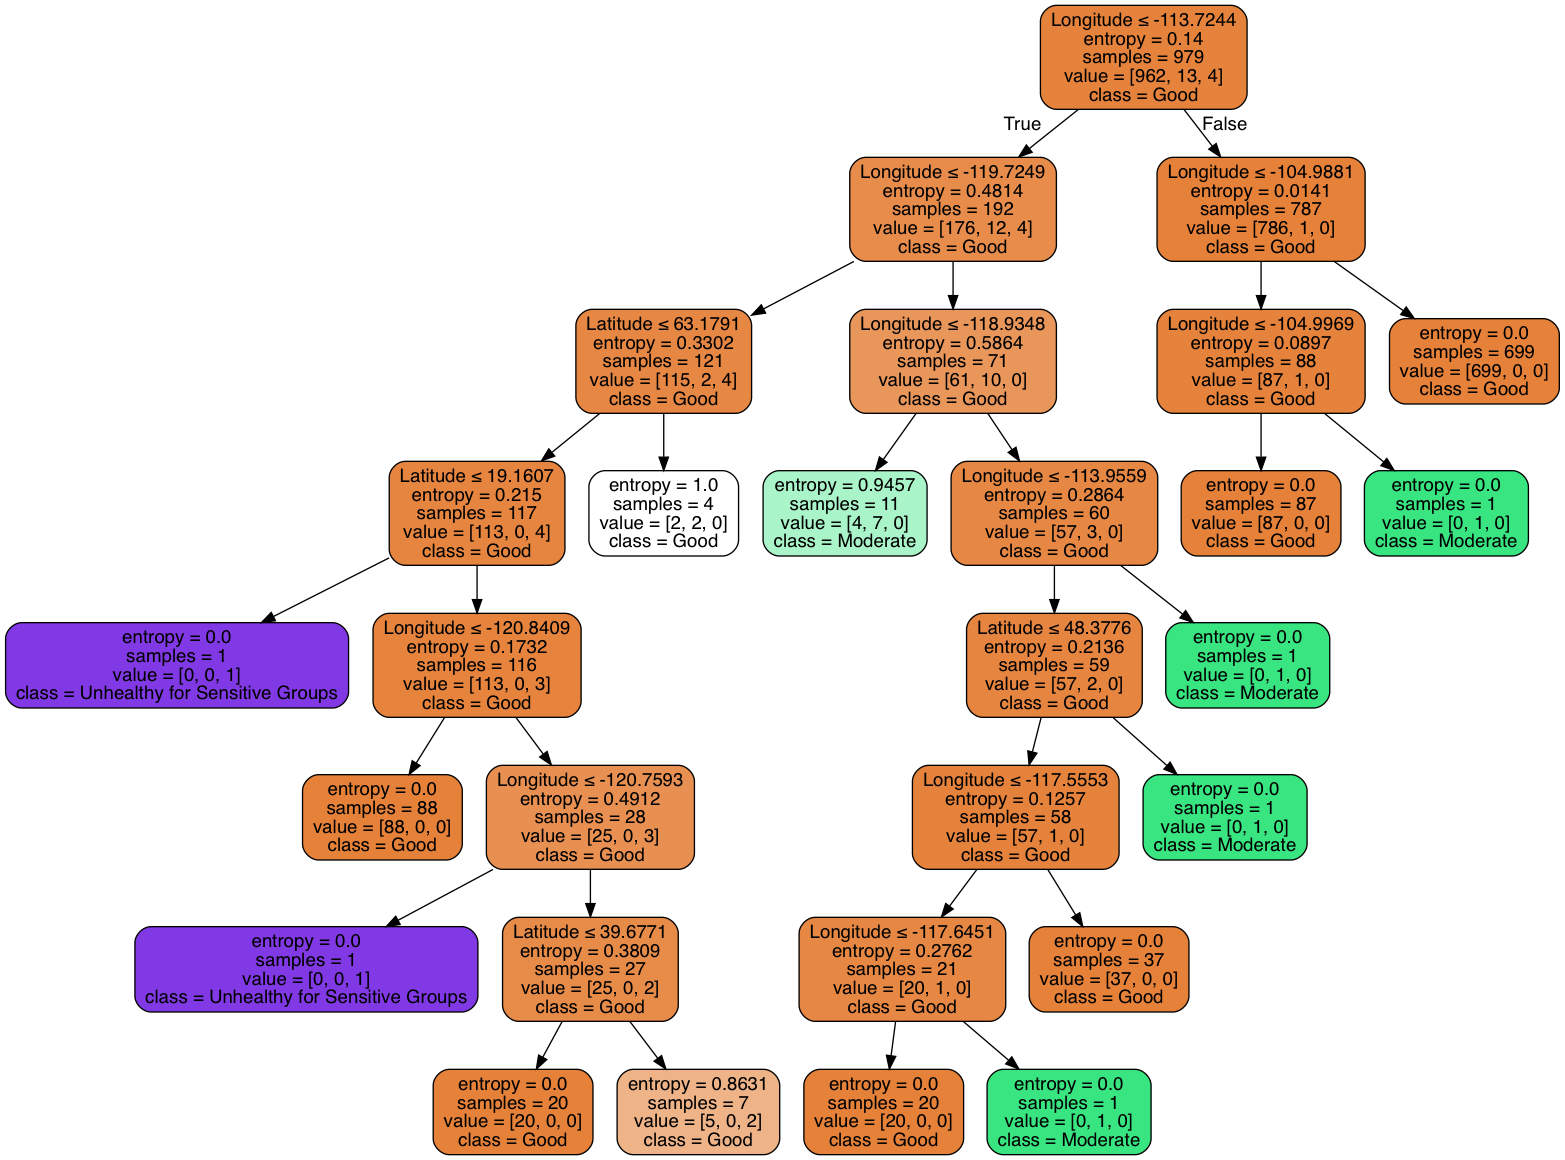

In [24]:
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(dtree, out_file=None,
                        feature_names=['Latitude', 'Longitude'],
                        class_names = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy',
                                       'Very Unhealthy','Hazardous'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<H1>Summary </H1>
<body>
<p>
<h2>Query 1 - Least and most polluted city in 2016 </h2>
    <br>
    In this query, I am comparing the AQI values of <b>Boston, New York City, Chicago, San Francisco and Los Angeles </b> for the year 2016. It is evident that <font color = 'blue'>Boston has the best AQI </font> while <font color = 'red'>Los Angeles is very polluted </font>. 
</p>
<p>
    <h2>Query 2 - Best Time to visit New York </h2>
    <br>
    Here, I am trying to find the best time to visit New York City by finding the average AQI of each month for the past 6 years. From the figure, it is clear that the months <b> April and October </b> have low AQI making them good months while <b> January, July and December </b> have very high AQI values.
</p>
<p>
    <h2>Query 3 - Correlation of AQI with latitude </h2>
    <br>
    Here, I am trying to find if there is any correlation between air quality and latitude. So, I plot the air quality index of each latitude averaged across all the months for the year 2015. The plot shows comparatively low AQI values for lower latitudes - it kinda makes sense since the southern part of USA is mostly desert. It also shows very high AQI for higher latitude - Alaska seems to have higher AQI values (which is validated in the next query as well). 
</p>
<p>
    <h2>Query 4 - Comparison of AQI values in 1999 and 2015 </h2>
    <br>
    Here, I am trying to find how the AQI of states has changed from 1999 to 2015. I do this by taking the average AQI of each state in both the years and finding the difference. I plot the difference on the map. Any state with positive value means that the AQI values have decreased from 1999 to 2015 while the states with negative increase have improved their AQI.
    <br> <br>
    From the figure, it is evident that <font color = 'red'> California, Alabama, Georgia have had a significant increase in quality of air </font> while  <font color = 'blue'> Alaska, Idaho, Montana, Texas have worsened air quality</font>.
</p>

<p>
<h2>Machine Learning Model 1 & 2 - Linear Regression </h2>
    <br>
   Here, I used linear regression to find if I can find any relation between latitude and aqi values and longitude and aqi values. I used the data I got for Query 3. On visualizing, it was clear that linear regression is not at all able to model the problem correctly. 
</p>

<p>
<h2>Machine Learning Model 3 - Decision Trees </h2>
    <br>
   I try to find some relation between longitude, latitude and the AQI values, using the data I got from Query 3. Instead of using the AQI values themselves, I encoded the values depending on the guidelines given in the <a href = 'https://airnow.gov/index.cfm?action=aqibasics.aqi'> EPA site </a>. 
</p>
</body>

<h5> Finally, take a moment to reflect on what we achieved here - we started with a raw dataset, processed them, built models and ran analytics to finally gain insights from the data :) </h5> 